## Hyperparam Tuning of Base SVM Model

In [9]:
import pandas as pd
import numpy as np

from sklearn import svm, preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, precision_recall_curve, confusion_matrix, plot_roc_curve, roc_auc_score, classification_report

import feather
from joblib import dump, load
import scikitplot as skplt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [10]:
PATH='/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/tmp/df_ft.feather'

In [11]:
df_ft = feather.read_dataframe(PATH)
display(df_ft)

x = df_ft.drop('URLType', axis=1)
y = df_ft["URLType"]

display(x)

x_scaled = preprocessing.scale(x)

X_train, x_test, Y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

,URLLength,HostLength,TLDLength,DotCount,DashCount,@Count,%Count,=Count,?Count,DigitCount,UniqueCharCount,URLType
0,105,9,0,2,14,0,0,0,0,19,31,0
1,102,10,0,2,12,0,0,0,0,19,34,0
2,97,9,0,2,12,0,0,0,0,21,27,0
3,95,15,0,1,10,0,0,0,0,5,30,0
4,87,11,0,2,13,0,0,0,0,6,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46939,96,7,0,2,4,0,0,1,1,24,31,0
46940,99,14,0,1,9,0,0,0,0,9,30,0
46941,107,13,0,1,8,0,0,0,0,41,34,0
46942,100,10,0,1,10,0,0,0,0,6,29,0


,URLLength,HostLength,TLDLength,DotCount,DashCount,@Count,%Count,=Count,?Count,DigitCount,UniqueCharCount
0,105,9,0,2,14,0,0,0,0,19,31
1,102,10,0,2,12,0,0,0,0,19,34
2,97,9,0,2,12,0,0,0,0,21,27
3,95,15,0,1,10,0,0,0,0,5,30
4,87,11,0,2,13,0,0,0,0,6,27
...,...,...,...,...,...,...,...,...,...,...,...
46939,96,7,0,2,4,0,0,1,1,24,31
46940,99,14,0,1,9,0,0,0,0,9,30
46941,107,13,0,1,8,0,0,0,0,41,34
46942,100,10,0,1,10,0,0,0,0,6,29


In [12]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score, n_jobs=1, verbose=5
    )
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.909, total=  14.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.904, total=  14.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.907, total=  14.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.2s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.912, total=  14.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   57.5s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.913, total=  14.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.891, total=  19.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.903, total=  19.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.890, total=  19.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.893, total=  19.6s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.900, total=  19.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.921, total=  11.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 145.9min finished


Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.909 (+/-0.006) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.895 (+/-0.010) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.922 (+/-0.006) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.908 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.932 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.914 (+/-0.007) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.946 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.922 (+/-0.006) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.912 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.912 (+/-0.009) for {'C': 10, 'kernel': 'linear'}
0.912 (+/-0.010) for {'C': 100, 'kernel': 'linear'}
0.911 (+/-0.010) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.882, total=  14.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.876, total=  14.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.5s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.882, total=  13.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.4s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.880, total=  13.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   56.3s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.876, total=  14.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.781, total=  19.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.782, total=  19.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.777, total=  19.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.777, total=  18.8s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.776, total=  18.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.902, total=  10.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 145.4min finished


Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.880 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.779 (+/-0.005) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.900 (+/-0.004) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.877 (+/-0.006) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.912 (+/-0.005) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.889 (+/-0.006) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.924 (+/-0.011) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.901 (+/-0.004) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.889 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
0.889 (+/-0.003) for {'C': 10, 'kernel': 'linear'}
0.889 (+/-0.003) for {'C': 100, 'kernel': 'linear'}
0.889 (+/-0.004) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

In [13]:
print(clf.best_estimator_)
# from hpsklearn import HyperoptEstimator, svc
# from sklearn import svm
# from sklearn.utils import check_array, check_X_y
# import numpy as np
# from skopt import BayesSearchCV


# estim = HyperoptEstimator(classifier=svc('mySVC'), max_evals=150, trial_timeout =60)
# X_train = X_train.astype(np.float64, copy=False)
# Y_train = Y_train.astype(np.float64, copy=False)

# X_train, Y_train = check_X_y(X_train, Y_train)
# X_train = X_train.astype(float)
# estim.fit(X_train, Y_train)
# print(estim.score(x_test, y_test))
# opt = BayesSearchCV(
#     SVC(),
#     {
#         'C': (1e-6, 1e+6, 'log-uniform'),  
#         'gamma': (1e-6, 1e+1, 'log-uniform'),
#         'degree': (1, 8),  # integer valued parameter
#         'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
#     },
#     n_iter=32,
#     cv=3
# )

# opt.fit(X_train, Y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [14]:
best_estim = clf.best_estimator_
dump(best_estim, 'models/best_estim.joblib')

y_pred = best_estim.predict(x_test)
accuracy_score(y_test, y_pred)

0.9567579081904356

In [16]:
estim = load('models/best_estim.joblib')
y_score = estim.decision_function(x_test)

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


[[6978  139]
 [ 267 2005]]


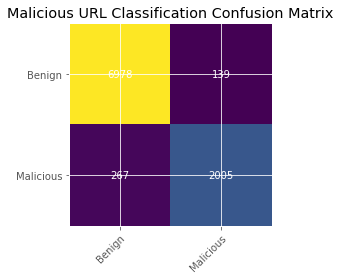

In [17]:
class_names = ['Benign', 'Malicious']

cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Malicious URL Classification Confusion Matrix")
fig.tight_layout()
plt.show()

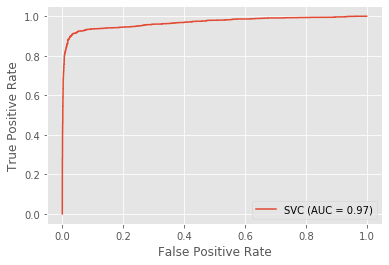

In [18]:
svc_disp = plot_roc_curve(estim, x_test, y_test)
plt.show()